<a href="https://colab.research.google.com/github/priyank-1/Deep_Learning/blob/main/ResNet_VggNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.layers import Input,Lambda ,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/train'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/test'
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/Colab_Notebooks/Datasets/train/*')

x = Flatten()(resnet.output)
prediction = Dense(len(folders) ,activation = "softmax")(x)

model = Model(inputs = resnet.input ,outputs = prediction)
model.summary()
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./ 255)
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/Datasets/train',
    target_size = [224,224],
    batch_size = 32,
    class_mode = 'categorical' ,
    classes=['audi', 'mercedes', 'lamborghini']
)


test_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/Datasets/test',
    target_size = [224,224],
    batch_size = 32,
    class_mode = 'categorical' ,
    classes=['audi', 'mercedes', 'lamborghini']
)

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [12]:
# steps_per_epoch = len(training_set) // 32
# validation_steps = len(test_set) // 32

reg = model.fit(
    training_set,
    validation_data = test_set,
    steps_per_epoch = len(training_set)  ,
    validation_steps = len(test_set),
    epochs = 50 ,
)
#

#  x=None,
#     y=None,
#     batch_size=None,
#     epochs=1,
#     verbose="auto",
#     callbacks=None,
#     validation_split=0.0,
#     validation_data=None,
#     shuffle=True,
#     class_weight=None,
#     sample_weight=None,
#     initial_epoch=0,
#     steps_per_epoch=None,
#     validation_steps=None,
#     validation_batch_size=None,
#     validation_freq=1,



Epoch 1/50
2/2 [==============================] - 44s 21s/step - loss: 7.2523 - accuracy: 0.3125 - val_loss: 4.6670 - val_accuracy: 0.3793
Epoch 2/50
2/2 [==============================] - 1s 475ms/step - loss: 3.4713 - accuracy: 0.5312 - val_loss: 6.2504 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 531ms/step - loss: 8.8393 - accuracy: 0.3438 - val_loss: 3.1458 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 1s 497ms/step - loss: 4.7201 - accuracy: 0.3906 - val_loss: 4.6372 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 484ms/step - loss: 3.8704 - accuracy: 0.3594 - val_loss: 9.0944 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 793ms/step - loss: 5.3682 - accuracy: 0.4062 - val_loss: 4.0151 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 612ms/step - loss: 1.8964 - accuracy: 0.4062 - val_loss: 1.6527 - val_accuracy: 0.5690
Epoch 8/50
2/2 [=====

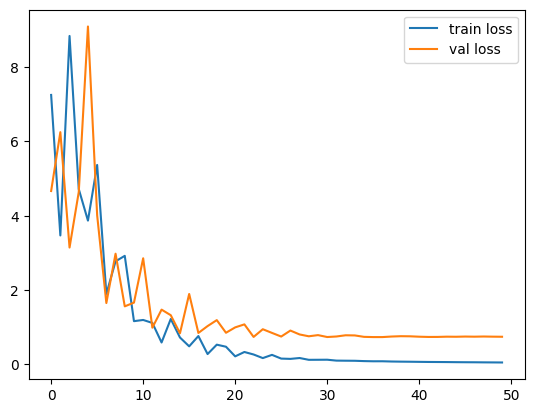

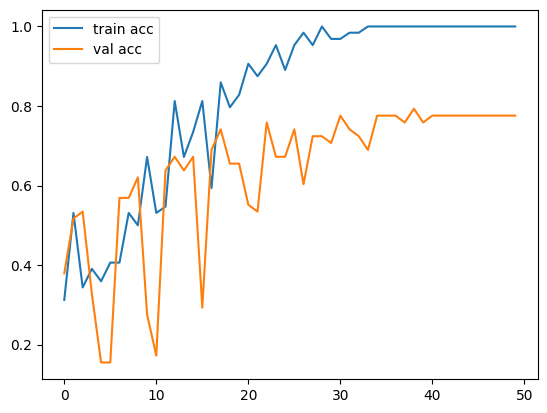

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(reg.history['loss'], label='train loss')
plt.plot(reg.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(reg.history['accuracy'], label='train acc')
plt.plot(reg.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
y_pred = model.predict(test_set)

2/2 [==============================] - 1s 176ms/step


In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2])

In [17]:
model=load_model('model_resnet50.h5')

In [18]:
img=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Datasets/test/lamborghini/11.jpg',target_size=(224,224))

In [19]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [20]:
x.shape

(224, 224, 3)

In [21]:
x=x/255
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.7607843 , 0.7372549 , 0.68235296],
        [0.84313726, 0.81960785, 0.77254903],
        [0.94509804, 0.92156863, 0.8745098 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.96862745, 0.9607843 , 0.9137255 ],
        [0.9607843 , 0.9490196 , 0.9137255 ],
        [0.95686275, 0.94509804, 0.9098039 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.972549  , 0.94509804],
        [0.95686275, 0.98039216, 0.972549  ],
        [0.95686275, 0.98039216, 0.972549  ]],

       ...,

       [[0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [22]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.01080182, 0.02507615, 0.96412206]], dtype=float32)

In [24]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 25ms/step


In [25]:
a==1

array([False])